<a href="https://colab.research.google.com/github/ignyz/Numerical-methods-and-algorithms/blob/main/L2_3_Optimizavimas_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price  200.01977151726243
22 Iteraciju Kaina 35.46097169019791


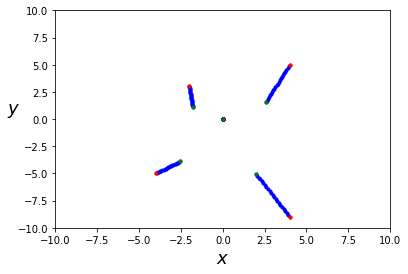

In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy 
import math
import matplotlib.pyplot as plt
import time
default_point = [0.,0.]
n = np.array([   [0.,0.], #O #0
   [1.,4.], #A #1
   [3.,4.], #B #2
   [3.,2.], #C #3 
    [5.,1.]  #D #4
])
n = np.array([   [0.,0.], #O #0
   [5.,4.], #A #1
   [-5.,-4.], #B #2
   [3.,-2.], #C #3 
    [-9.,4.]  #D #4
])
npnt =n.shape[0];iii = 0;itmax = 5000;step = 0.3;n0 = np.zeros((npnt, 2))
pnt = np.zeros((npnt, 2));costs = np.zeros(npnt - 1);n0 = np.array(n);pnt = np.array(n)

def c(L): # pagaminimo kaina  = C(l) = ( l - a ) ^ 2
  c = 0.
  a = 6. # $$$
  c = (L - a)**2
  return c

def c(L): # pagaminimo kaina  = C(l) = ( l - a ) ^ 2
  c = 0.
  a = 6. # $$$
  c = (L - a)**2
  return c

def AB(A,B):
  l = 0.
  l = math.sqrt( ((A[0]-B[0])**2)+((A[1]-B[1])**2) )
  return l

def SUM(X):
  npnt = X.shape[0]
  rez = 0.
  total_len = 0.
  for i in range(npnt-1):
    for ii in range(i+1,npnt):
      length = AB(X[i],X[ii])
      total_len = total_len + length
      price = c(length)
      rez = rez + price
  return rez

def gradientasF(x):
    h = 1.145
    length = x.shape[0]
    gradientas = np.zeros((length, 2))
    for i in range(length):
        last_one = np.array(x)
        last_one[i] = (x[i, 0] + h, x[i, 1])
        gradientasX = (SUM(last_one) - SUM(x))/h
        last_one[i] = (x[i, 0], x[i, 1] + h)
        gradientasY = (SUM(last_one) - SUM(x)) / h
        gradientas[i] = (gradientasX, gradientasY)
    return gradientas
#animacijos
plt.plot(n[:,1],n[:,0],'r.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([-10,10,-10,10])
#_=plt.axis([-6,6,-6,6])

#plt.plot(n[:,1],n[:,0],'--b')
#plt.xlabel("$x$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
#_ =plt.axis([-10,10,-10,10])

print("Price ", SUM(pnt))
old_price = SUM(pnt)
latest_price = -999.
gradientas = gradientasF(n0)

while iii < itmax and old_price > latest_price  :
    iii = iii + 1
    normal = LA.norm(gradientas)
    deltax = gradientas / normal * step
    pnt[0] = [0.,0.]
    old_price = SUM(pnt)
    length = pnt.shape[0]
    for i in range(length):
      pnt[0] = [0.,0.]
      a = pnt[i, 0] - deltax[i, 0]
      b = pnt[i, 1] - deltax[i, 1]
      pnt[i] = [a, b]
    plt.plot(pnt[:,1],pnt[:,0],'b.')
    #plt.pause(0.000000000000001)
    #plt.draw()
    latest_price = SUM(pnt)


print(iii,"Iteraciju Kaina", SUM(pnt))
plt.plot(n[:,1],n[:,0],'r.')

plt.plot(pnt[:,1],pnt[:,0],'g.')

#plt.scatter(pnt[:,1],pnt[:,0], zorder=2)
#plt.plot(pnt[:,1],pnt[:,0], zorder=1)


plt.show()


